In [268]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [269]:
employee_feedback=pd.read_csv("C:/Users/Tenisha/Downloads/employee_review.csv")
employee_feedback.head(5)

ID      Place           location           date             status  \
0   1  startup_1                NaN   Dec 11, 2018  Current Employee    
1   2  startup_1  Mountain View, CA   Jun 21, 2013   Former Employee    
2   3  startup_1       New York, NY   May 10, 2014  Current Employee    
3   4  startup_1  Mountain View, CA    Feb 8, 2015  Current Employee    
4  10  startup_1                NaN    Dec 9, 2018  Current Employee    

                job_title                                            summary  \
0      Anonymous Employee                           Best Company to work for   
1         Program Manager  Moving at the speed of light, burn out is inev...   
2   Software Engineer III  Great balance between big-company security and...   
3      Anonymous Employee  The best place I've worked and also the most d...   
4      Anonymous Employee                           Execellent for engineers   

                                           positives  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4             Impact driven. Best tech in the world.   

                                           negatives  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  Size matters. Engineers are a bit disconnected...   

                                      advice_to_mgmt  score_1  score_2  \
0                                                NaN      4.0      5.0   
1  1) Don't dismiss emotional intelligence and ad...      2.0      3.0   
2  Keep the focus on the user. Everything else wi...      5.0      4.0   
3  Keep on NOT micromanaging - that is a huge ben...      2.0      5.0   
4                                                NaN      5.0      5.0   

   score_3  score_4  score_5  score_6  overall  
0      5.0      4.0      5.0        0        5  
1      3.0      5.0      3.0     2094        5  
2      5.0      5.0      4.0      949        5  
3      5.0      4.0      5.0      498        4  
4      5.0      5.0      5.0        0        4

In [270]:
employee_feedback.shape

(30336, 17)

In [271]:
employee_feedback.columns

Index(['ID', 'Place', 'location', 'date', 'status', 'job_title', 'summary',
       'positives', 'negatives', 'advice_to_mgmt', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6', 'overall'],
      dtype='object')

In [272]:
employee_feedback.isnull().sum()

ID                    0
Place                 0
location          11254
date                  0
status                0
job_title             0
summary              52
positives             0
negatives             0
advice_to_mgmt    13277
score_1            3186
score_2            6050
score_3            3169
score_4            3191
score_5            3485
score_6               0
overall               0
dtype: int64

In [273]:
employee_feedback=employee_feedback.dropna()

In [274]:
employee_feedback.shape

(10040, 17)

In [275]:
employee_feedback.columns

Index(['ID', 'Place', 'location', 'date', 'status', 'job_title', 'summary',
       'positives', 'negatives', 'advice_to_mgmt', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6', 'overall'],
      dtype='object')

In [276]:
df1=pd.DataFrame(employee_feedback)
df1.columns

Index(['ID', 'Place', 'location', 'date', 'status', 'job_title', 'summary',
       'positives', 'negatives', 'advice_to_mgmt', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6', 'overall'],
      dtype='object')

In [277]:
df2=df1[['positives','negatives','advice_to_mgmt']]

df2

positives  \
1      1) Food, food, food. 15+ cafes on main campus ...   
2      * If you're a software engineer, you're among ...   
3      You can't find a more well-regarded company th...   
10      I like and learned from the beginning accounting   
21     Employees, food, benefits, perks, shuttle, bas...   
...                                                  ...   
30055  Leader and very exciting to know the people wh...   
30061  Good work life balance, and the pay isn't that...   
30063  You can experience a variety of roles in a sho...   
30070          1. Flexibility 2. Cross functional growth   
30072          1. Flexibility 2. Cross functional growth   

                                               negatives  \
1      1) Work/life balance. What balance? All those ...   
2      * It *is* becoming larger, and with it comes g...   
3      I live in SF so the commute can take between 1...   
10                 High clerical work in the Sane record   
21     Company has become way too vertical, performan...   
...                                                  ...   
30055  There is no flexible timing nor work from home...   
30061  No really a true sales organization and it's a...   
30063          Compensation and career growth is average   
30070  1. Microsoft has excellent performance managem...   
30072  1. Microsoft has excellent performance managem...   

                                          advice_to_mgmt  
1      1) Don't dismiss emotional intelligence and ad...  
2      Keep the focus on the user. Everything else wi...  
3      Keep on NOT micromanaging - that is a huge ben...  
10     Management and Finance must be close relation ...  
21     Stop putting people on a bell curve, and recog...  
...                                                  ...  
30055  Work from home option would be option to many ...  
30061  Break the company into 4 separate companies an...  
30063  Should take more interest in the career growth...  
30070            Performance Management Should be robust  
30072            Performance Management Should be robust  

[10040 rows x 3 columns]

<h2 style = text-align:centre;colour=blue>TEXT PREPROCESSING <h2>
 

In [208]:
import nltk

In [278]:
positive_review=df2.positives
positive_review


1        1) Food, food, food. 15+ cafes on main campus ...
2        * If you're a software engineer, you're among ...
3        You can't find a more well-regarded company th...
10        I like and learned from the beginning accounting
21       Employees, food, benefits, perks, shuttle, bas...
                               ...                        
30055    Leader and very exciting to know the people wh...
30061    Good work life balance, and the pay isn't that...
30063    You can experience a variety of roles in a sho...
30070            1. Flexibility 2. Cross functional growth
30072            1. Flexibility 2. Cross functional growth
Name: positives, Length: 10040, dtype: object

In [279]:
###lowercasing
text1=positive_review.str.lower()
text1

1        1) food, food, food. 15+ cafes on main campus ...
2        * if you're a software engineer, you're among ...
3        you can't find a more well-regarded company th...
10        i like and learned from the beginning accounting
21       employees, food, benefits, perks, shuttle, bas...
                               ...                        
30055    leader and very exciting to know the people wh...
30061    good work life balance, and the pay isn't that...
30063    you can experience a variety of roles in a sho...
30070            1. flexibility 2. cross functional growth
30072            1. flexibility 2. cross functional growth
Name: positives, Length: 10040, dtype: object

In [280]:
###removing whitespace
text2=positive_review.str.strip()
text2

1        1) Food, food, food. 15+ cafes on main campus ...
2        * If you're a software engineer, you're among ...
3        You can't find a more well-regarded company th...
10        I like and learned from the beginning accounting
21       Employees, food, benefits, perks, shuttle, bas...
                               ...                        
30055    Leader and very exciting to know the people wh...
30061    Good work life balance, and the pay isn't that...
30063    You can experience a variety of roles in a sho...
30070            1. Flexibility 2. Cross functional growth
30072            1. Flexibility 2. Cross functional growth
Name: positives, Length: 10040, dtype: object

In [281]:
###removing punctuations
import string
print(string.punctuation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [282]:
import re
remove_punctuation="".join([char for char in text2 if char not in string.punctuation]) 
remove_punctuation



'1) Food, food, food. 15+ cafes on main campus (MTV) alone. Mini-kitchens, snacks, drinks, free breakfast/lunch/dinner, all day, errr\'day.  2) Benefits/perks. Free 24:7 gym access (on MTV campus). Free (self service) laundry (washer/dryer) available. Bowling alley. Volley ball pit. Custom-built and exclusive employee use only outdoor sport park (MTV). Free health/fitness assessments. Dog-friendly. Etc. etc. etc.  3) Compensation. In ~2010 or 2011, Google updated its compensation packages so that they were more competitive.  4) For the size of the organization (30K+), it has remained relatively innovative, nimble, and fast-paced and open with communication but, that is definitely changing (for the worse).  5) With so many departments, focus areas, and products, *in theory*, you should have plenty of opportunity to grow your career (horizontally or vertically). In practice, not true.  6) You get to work with some of the brightest, most innovative and hard-working/diligent minds in the i

In [284]:
import re
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

In [285]:
number_remove=remove_numbers(remove_punctuation)
print(number_remove)


) Food, food, food. + cafes on main campus (MTV) alone. Mini-kitchens, snacks, drinks, free breakfast/lunch/dinner, all day, errr'day.  ) Benefits/perks. Free : gym access (on MTV campus). Free (self service) laundry (washer/dryer) available. Bowling alley. Volley ball pit. Custom-built and exclusive employee use only outdoor sport park (MTV). Free health/fitness assessments. Dog-friendly. Etc. etc. etc.  ) Compensation. In ~ or , Google updated its compensation packages so that they were more competitive.  ) For the size of the organization (K+), it has remained relatively innovative, nimble, and fast-paced and open with communication but, that is definitely changing (for the worse).  ) With so many departments, focus areas, and products, *in theory*, you should have plenty of opportunity to grow your career (horizontally or vertically). In practice, not true.  ) You get to work with some of the brightest, most innovative and hard-working/diligent minds in the industry. There's a "con

In [286]:
import re
                                      
def remove_puncts(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)



In [287]:
###remove_numbers
def remove_numbers(x):
    result=re.sub(r'\d+','',x)
    return result



In [288]:
cleaned_text=remove_puncts(number_remove)
print(cleaned_text)

 Food food food  cafes on main campus MTV alone Minikitchens snacks drinks free breakfastlunchdinner all day errrday   Benefitsperks Free  gym access on MTV campus Free self service laundry washerdryer available Bowling alley Volley ball pit Custombuilt and exclusive employee use only outdoor sport park MTV Free healthfitness assessments Dogfriendly Etc etc etc   Compensation In  or  Google updated its compensation packages so that they were more competitive   For the size of the organization K it has remained relatively innovative nimble and fastpaced and open with communication but that is definitely changing for the worse   With so many departments focus areas and products in theory you should have plenty of opportunity to grow your career horizontally or vertically In practice not true   You get to work with some of the brightest most innovative and hardworkingdiligent minds in the industry Theres a con to that too see below If youre a software engineer youre among the kings of the

In [289]:
text4=cleaned_text.lower()

In [290]:
###tokenisation
from nltk import word_tokenize
def tokenization(text):
    tokenize_words=word_tokenize(text)
    return tokenize_word

In [291]:
tokenize_words=word_tokenize(text4)
tokenize_words

['food',
 'food',
 'food',
 'cafes',
 'on',
 'main',
 'campus',
 'mtv',
 'alone',
 'minikitchens',
 'snacks',
 'drinks',
 'free',
 'breakfastlunchdinner',
 'all',
 'day',
 'errrday',
 'benefitsperks',
 'free',
 'gym',
 'access',
 'on',
 'mtv',
 'campus',
 'free',
 'self',
 'service',
 'laundry',
 'washerdryer',
 'available',
 'bowling',
 'alley',
 'volley',
 'ball',
 'pit',
 'custombuilt',
 'and',
 'exclusive',
 'employee',
 'use',
 'only',
 'outdoor',
 'sport',
 'park',
 'mtv',
 'free',
 'healthfitness',
 'assessments',
 'dogfriendly',
 'etc',
 'etc',
 'etc',
 'compensation',
 'in',
 'or',
 'google',
 'updated',
 'its',
 'compensation',
 'packages',
 'so',
 'that',
 'they',
 'were',
 'more',
 'competitive',
 'for',
 'the',
 'size',
 'of',
 'the',
 'organization',
 'k',
 'it',
 'has',
 'remained',
 'relatively',
 'innovative',
 'nimble',
 'and',
 'fastpaced',
 'and',
 'open',
 'with',
 'communication',
 'but',
 'that',
 'is',
 'definitely',
 'changing',
 'for',
 'the',
 'worse',
 'with

In [229]:
##removing repeated words
text5=set(tokenize_words)
text5

{'generally',
 'otsmart',
 'assign',
 'atleast',
 'promoters',
 'averagelots',
 'productsi',
 'adds',
 'insuranceif',
 'wisegood',
 'excellenceemployee',
 'testa',
 'culturehaving',
 'honorable',
 'low',
 'jobbenefits',
 'worldclass',
 'therefore',
 'opinionleader',
 'checkyou',
 'awesomeadvancement',
 'retired',
 'environmenthave',
 'lifemy',
 'casegreat',
 'evaluations',
 'revitalized',
 'muchdress',
 'avenues',
 'peoplefree',
 'managementmicrosoft',
 'mtv',
 'foods',
 'experiencefastpaced',
 'international',
 'glossy',
 'adaptable',
 'unmatchedmark',
 'her',
 'microsoftthe',
 'levelsendless',
 'welcome',
 'everywherethere',
 'wellintentioned',
 'wellgood',
 'avond',
 'sports',
 'worknamefast',
 'productsvery',
 'blowing',
 'consists',
 'sees',
 'kfastmoving',
 'jan',
 'template',
 'schoolgood',
 'experiencepart',
 'afe',
 'consideringlearning',
 'ie',
 'withnice',
 'youonly',
 'donegood',
 'multiaz',
 'standardsat',
 'theregetting',
 'delicious',
 'thingsgrowth',
 'transportationama

In [235]:
###removing stop words
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
print(stop_words)
filtered_words = [char for char in text5 if char not in stop_words]
filtered_words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

['generally',
 'otsmart',
 'assign',
 'atleast',
 'promoters',
 'averagelots',
 'productsi',
 'adds',
 'insuranceif',
 'wisegood',
 'excellenceemployee',
 'testa',
 'culturehaving',
 'honorable',
 'low',
 'jobbenefits',
 'worldclass',
 'therefore',
 'opinionleader',
 'checkyou',
 'awesomeadvancement',
 'retired',
 'environmenthave',
 'lifemy',
 'casegreat',
 'evaluations',
 'revitalized',
 'muchdress',
 'avenues',
 'peoplefree',
 'managementmicrosoft',
 'mtv',
 'foods',
 'experiencefastpaced',
 'international',
 'glossy',
 'adaptable',
 'unmatchedmark',
 'microsoftthe',
 'levelsendless',
 'welcome',
 'everywherethere',
 'wellintentioned',
 'wellgood',
 'avond',
 'sports',
 'worknamefast',
 'productsvery',
 'blowing',
 'consists',
 'sees',
 'kfastmoving',
 'jan',
 'template',
 'schoolgood',
 'experiencepart',
 'afe',
 'consideringlearning',
 'ie',
 'withnice',
 'youonly',
 'donegood',
 'multiaz',
 'standardsat',
 'theregetting',
 'delicious',
 'thingsgrowth',
 'transportationamazon',
 '

In [292]:
##stemming
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
stemmed=[porter.stem(word) for word in filtered_words]
print(stemmed)

['gener', 'otsmart', 'assign', 'atleast', 'promot', 'averagelot', 'productsi', 'add', 'insuranceif', 'wisegood', 'excellenceemploye', 'testa', 'culturehav', 'honor', 'low', 'jobbenefit', 'worldclass', 'therefor', 'opinionlead', 'checkyou', 'awesomeadvanc', 'retir', 'environmenthav', 'lifemi', 'casegreat', 'evalu', 'revit', 'muchdress', 'avenu', 'peoplefre', 'managementmicrosoft', 'mtv', 'food', 'experiencefastpac', 'intern', 'glossi', 'adapt', 'unmatchedmark', 'microsoftth', 'levelsendless', 'welcom', 'everywherether', 'wellintent', 'wellgood', 'avond', 'sport', 'worknamefast', 'productsveri', 'blow', 'consist', 'see', 'kfastmov', 'jan', 'templat', 'schoolgood', 'experiencepart', 'afe', 'consideringlearn', 'ie', 'withnic', 'youonli', 'donegood', 'multiaz', 'standardsat', 'thereget', 'delici', 'thingsgrowth', 'transportationamazon', 'sdeii', 'areanamefast', 'degrad', 'gogett', 'siemensgec', 'easilyexperi', 'socialist', 'all', 'tuition', 'promotionsget', 'season', 'fitpay', 'facebookcut'

In [293]:
###lemmatization 
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
lemma_words=[]


In [294]:
for word in filtered_words:
    lemma_words.append(lemmatizer.lemmatize(word))
print(lemmatizer.lemmatize(word))

culturemall


<h3> CLASSIFICATION MODEL <h3>

In [295]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [246]:
conda install -c conda-forge wordcloud

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Tenisha\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_0         3.1 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    wordcloud-1.8.1            |   py38h294d835_1         196 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38
  wordcloud          conda-forge/win-64::wordcloud-1.8.1-py38h294d835_1

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.1-py38haa95532_1 --> conda-forge::conda-4.10.3-py38haa244fe_0




w

In [296]:
from wordcloud import WordCloud,STOPWORDS



In [297]:
filterwords=str(filtered_words)
filterwords
tokenize_words
token_words=str(tokenize_words)

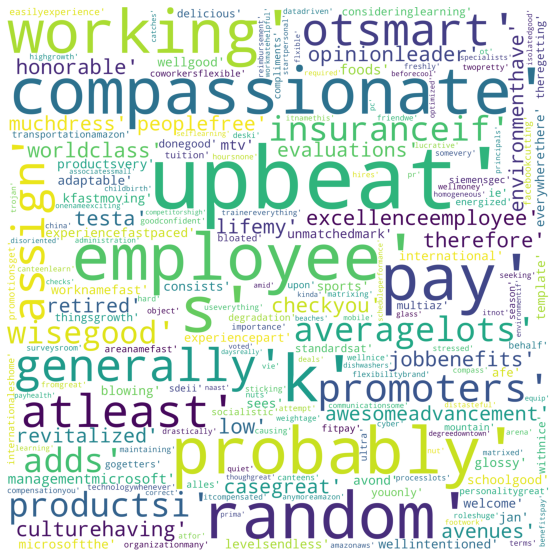

In [298]:
wordcloud = WordCloud(width = 5000, height = 5000, random_state=5, background_color='white', collocations=False, stopwords = STOPWORDS).generate(filterwords)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');